In [1]:
from games.rps import RPS
from agents.regretmatching import RegretMatching
from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent

In [2]:
g = RPS()

In [3]:
g.reset()

({'agent_0': None, 'agent_1': None}, None)

In [4]:
rm = dict(map(lambda agent: (agent, RegretMatching(game=g, agent=agent, seed=1)), g.agents))

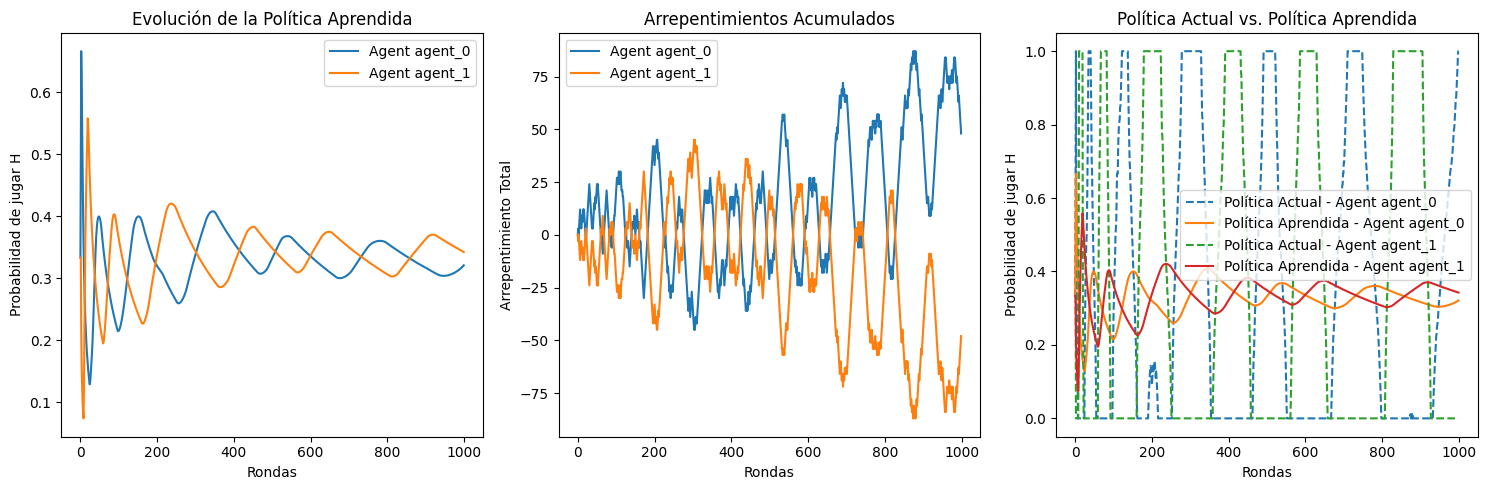

In [5]:
import numpy as np
import matplotlib.pyplot as plt

g.reset()  
rm = dict(map(lambda agent: (agent, RegretMatching(game=g, agent=agent, seed=1)), g.agents))

# Número de rondas que queremos jugar
num_rounds = 1000

# Listas para almacenar los registros
strategy_evolution_rm = {agent: [] for agent in g.agents}
cum_regrets_evolution = {agent: [] for agent in g.agents}
curr_policy_evolution = {agent: [] for agent in g.agents}

# Ejecutar el juego
for _ in range(num_rounds):
    actions = dict(map(lambda agent: (agent, rm[agent].action()), g.agents))
    g.step(actions)
    
    for agent in g.agents:
        # Registramos la política aprendida, los arrepentimientos acumulados y la política actual
        strategy_evolution_rm[agent].append(rm[agent].policy()[0])
        cum_regrets_evolution[agent].append(sum(rm[agent].cum_regrets))
        curr_policy_evolution[agent].append(rm[agent].curr_policy[0])

# Visualización
plt.figure(figsize=(15, 5))

# Gráfico de la evolución de la política aprendida
plt.subplot(1, 3, 1)
for agent in g.agents:
    plt.plot(strategy_evolution_rm[agent], label=f'Agent {agent}')
plt.title('Evolución de la Política Aprendida')
plt.xlabel('Rondas')
plt.ylabel('Probabilidad de jugar H')
plt.legend()

# Gráfico de los arrepentimientos acumulados
plt.subplot(1, 3, 2)
for agent in g.agents:
    plt.plot(cum_regrets_evolution[agent], label=f'Agent {agent}')
plt.title('Arrepentimientos Acumulados')
plt.xlabel('Rondas')
plt.ylabel('Arrepentimiento Total')
plt.legend()

# Gráfico de la política actual vs. la política aprendida
plt.subplot(1, 3, 3)
for agent in g.agents:
    plt.plot(curr_policy_evolution[agent], label=f'Política Actual - Agent {agent}', linestyle='--')
    plt.plot(strategy_evolution_rm[agent], label=f'Política Aprendida - Agent {agent}')
plt.title('Política Actual vs. Política Aprendida')
plt.xlabel('Rondas')
plt.ylabel('Probabilidad de jugar H')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, rm[agent].action()), g.agents))
    g.step(actions)

In [6]:
dict(map(lambda agent: (agent, rm[agent].policy()), g.agents))

{'agent_0': array([0.33382656, 0.33902779, 0.32714565]),
 'agent_1': array([0.34451397, 0.31698731, 0.33849871])}

In [7]:
agent_classes = [ RegretMatching, RandomAgent ]
my_agents = {}
g.reset()
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)


In [8]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, my_agents[agent].action()), g.agents))
    g.step(actions)

In [9]:
dict(map(lambda agent: (agent, my_agents[agent].policy()), g.agents))

{'agent_0': array([0.26033391, 0.33364607, 0.40602003]),
 'agent_1': array([0.33333333, 0.33333333, 0.33333333])}

In [10]:
g.reset()

({'agent_0': None, 'agent_1': None}, None)

In [11]:
fp = dict(map(lambda agent: (agent, FictitiousPlay(game=g, agent=agent, seed=1)), g.agents))

In [12]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, fp[agent].action()), g.agents))
    g.step(actions)

In [13]:
dict(map(lambda agent: (agent, fp[agent].policy()), g.agents))

{'agent_0': array([0.34171657, 0.33313373, 0.3251497 ]),
 'agent_1': array([0.3290013 , 0.33359992, 0.33739878])}

In [14]:
agent_classes = [ FictitiousPlay, RandomAgent ]
my_agents = {}
g.reset()
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)


In [15]:
for i in range(10000):
    actions = dict(map(lambda agent: (agent, my_agents[agent].action()), g.agents))
    g.step(actions)

In [16]:
dict(map(lambda agent: (agent, my_agents[agent].policy()), g.agents))

{'agent_0': array([0.54450994, 0.02008193, 0.43540813]),
 'agent_1': array([0.33333333, 0.33333333, 0.33333333])}